In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('CS 105 Project.csv')

#df = df.set_index(['Year', 'Rank'])

df["Number of Employees"] = df["Number of Employees"].replace({'\,':''}, regex = True)
df["Number of Employees"] = df["Number of Employees"].replace({'\,':''}, regex = True)
df["Number of Employees"] = df["Number of Employees"].fillna(0)
df["Number of Employees"] = df["Number of Employees"].astype(float)

df.loc[df['Change in Rank'] == '-', 'Change in Rank'] = 0
df["Change in Rank"] = df["Change in Rank"].fillna(0)
df["Change in Rank"] = df["Change in Rank"].astype(int)

df["Revenues ($millions)"] = df["Revenues ($millions)"].replace({'\$':''}, regex = True)
df["Revenues ($millions)"] = df["Revenues ($millions)"].replace({'\,':''}, regex = True)
df["Revenues ($millions)"] = df["Revenues ($millions)"].fillna(0)
df["Revenues ($millions)"] = df["Revenues ($millions)"].astype(float)

df["Revenue Change"] = df["Revenue Change"].replace({'\%':''}, regex = True)
df.loc[df['Revenue Change'] == '-', 'Revenue Change'] = 0
df["Revenue Change"] = df["Revenue Change"].fillna(0)
df["Revenue Change"] = df["Revenue Change"].astype(float)

df["Profits ($millions)"] = df["Profits ($millions)"].replace({'\$':''}, regex = True)
df["Profits ($millions)"] = df["Profits ($millions)"].replace({'\,':''}, regex = True)
df.loc[df['Profits ($millions)'] == '-', 'Profits ($millions)'] = 0
df["Profits ($millions)"] = df["Profits ($millions)"].fillna(0)
df["Profits ($millions)"] = df["Profits ($millions)"].astype(float)

df["Profit Change"] = df["Profit Change"].replace({'\%':''}, regex = True)
df.loc[df['Profit Change'] == '-', 'Profit Change'] = 0
df["Profit Change"] = df["Profit Change"].fillna(0)
df["Profit Change"] = df["Profit Change"].astype(float)

df["Assets ($millions)"] = df["Assets ($millions)"].replace({'\$':''}, regex = True)
df["Assets ($millions)"] = df["Assets ($millions)"].replace({'\,':''}, regex = True)
df["Assets ($millions)"] = df["Assets ($millions)"].fillna(0)
df["Assets ($millions)"] = df["Assets ($millions)"].astype(float)

df["Market Value As of 3/29/19 ($m)"] = df["Market Value As of 3/29/19 ($m)"].replace({'\$':''}, regex = True)
df["Market Value As of 3/29/19 ($m)"] = df["Market Value As of 3/29/19 ($m)"].replace({'\,':''}, regex = True)
df.loc[df['Market Value As of 3/29/19 ($m)'] == '-', 'Market Value As of 3/29/19 ($m)'] = 0
df["Market Value As of 3/29/19 ($m)"] = df["Market Value As of 3/29/19 ($m)"].fillna(0)
df["Market Value As of 3/29/19 ($m)"] = df["Market Value As of 3/29/19 ($m)"].astype(float)

df.head()
#Usman

,Rank,Company Name,Number of Employees,Change in Rank,Revenues ($millions),Revenue Change,Profits ($millions),Profit Change,Assets ($millions),Market Value As of 3/29/19 ($m),Year
0,1,Walmart,2200000.0,0,514405.0,2.8,6670.0,-32.4,219295.0,279880.0,2019
1,2,Exxon Mobil,71000.0,0,290212.0,18.8,20840.0,5.7,346196.0,342172.0,2019
2,3,Apple,132000.0,1,265595.0,15.9,59531.0,23.1,365725.0,895667.0,2019
3,4,Berkshire Hathaway,389000.0,-1,247837.0,2.4,4021.0,-91.1,707794.0,493870.0,2019
4,5,Amazon.com,647500.0,3,232887.0,30.9,10073.0,232.1,162648.0,874710.0,2019


In [2]:
df.describe()

,Rank,Number of Employees,Change in Rank,Revenues ($millions),Revenue Change,Profits ($millions),Profit Change,Assets ($millions),Market Value As of 3/29/19 ($m),Year
count,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000
mean,250.499333,5.696114e+04,169.955333,25727.784000,8.232400,2020.940800,42.386000,8.351304e+04,42423.356667,2018.000000
std,144.385600,1.238835e+05,172.959504,41020.280072,23.497572,4578.042001,813.735767,2.759217e+05,86966.635543,0.816769
min,1.000000,1.260000e+02,-131.000000,5145.000000,-57.500000,-22355.000000,-11700.000000,4.370000e+02,0.000000,2017.000000
25%,125.750000,1.190000e+04,7.000000,7651.000000,0.000000,288.950000,-16.225000,9.134250e+03,5907.750000,2017.000000
50%,250.500000,2.520200e+04,123.500000,12024.000000,5.100000,812.200000,0.900000,2.015800e+04,15753.500000,2018.000000
75%,375.250000,5.809925e+04,312.250000,23387.000000,11.725000,2062.500000,35.825000,5.128525e+04,41470.500000,2019.000000
max,500.000000,2.300000e+06,761.000000,514405.000000,465.300000,59531.000000,23178.300000,3.418318e+06,904861.000000,2019.000000


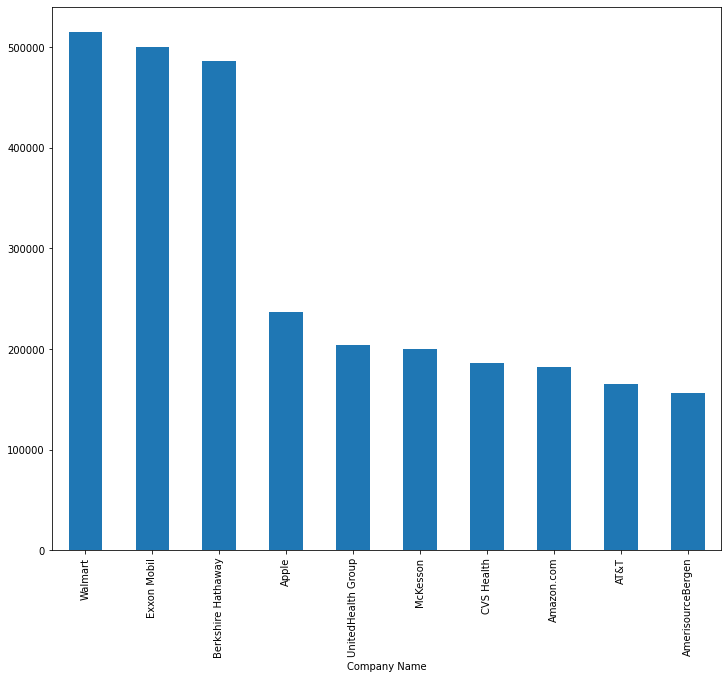

In [3]:
import matplotlib.pyplot as plt
df1 = df[(df['Company Name'] == "Apple") | (df['Company Name'] == "Walmart") | (df['Company Name'] == "Exxon Mobil") | (df['Company Name'] == "Berkshire Hathaway") | (df['Company Name'] == "Amazon.com") | (df['Company Name'] == "UnitedHealth Group") | (df['Company Name'] == "McKesson") | (df['Company Name'] == "CVS Health") | (df['Company Name'] == "AT&T") | (df['Company Name'] == "AmerisourceBergen")]
df1.groupby('Company Name')['Revenues ($millions)'].plot(kind = 'bar', fig=(12,10))
df1.groupby(['Company Name']).mean()['Revenues ($millions)'].sort_values(ascending=False).plot(kind="bar",figsize=(12,10))
plt.show()
#Devang

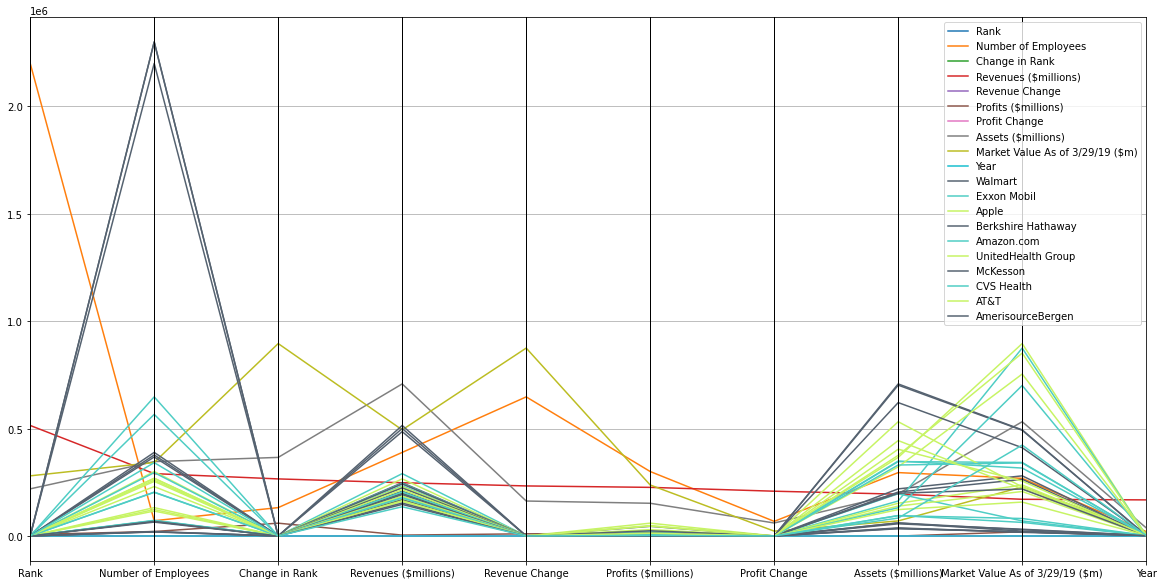

In [4]:
import matplotlib.pyplot as plt

df1 = df[(df['Company Name'] == "Apple") | (df['Company Name'] == "Walmart") | (df['Company Name'] == "Exxon Mobil") | (df['Company Name'] == "Berkshire Hathaway") | (df['Company Name'] == "Amazon.com") | (df['Company Name'] == "UnitedHealth Group") | (df['Company Name'] == "McKesson") | (df['Company Name'] == "CVS Health") | (df['Company Name'] == "AT&T") | (df['Company Name'] == "AmerisourceBergen")]
df1.plot(figsize=(20,10))
pd.plotting.parallel_coordinates(
        df1, 'Company Name',
        color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

#Devang

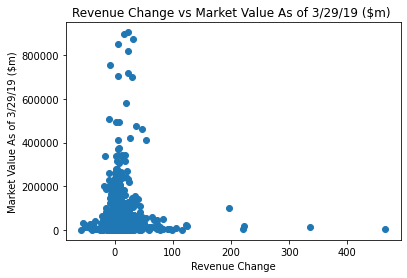

In [5]:
fig=plt.figure()
plt.scatter(df["Revenue Change"], df["Market Value As of 3/29/19 ($m)"])
axis = fig.gca() #get current axis
axis.set_title('Revenue Change vs Market Value As of 3/29/19 ($m) ')
axis.set_xlabel('Revenue Change')
axis.set_ylabel('Market Value As of 3/29/19 ($m)')
fig.canvas.draw()
#Luis

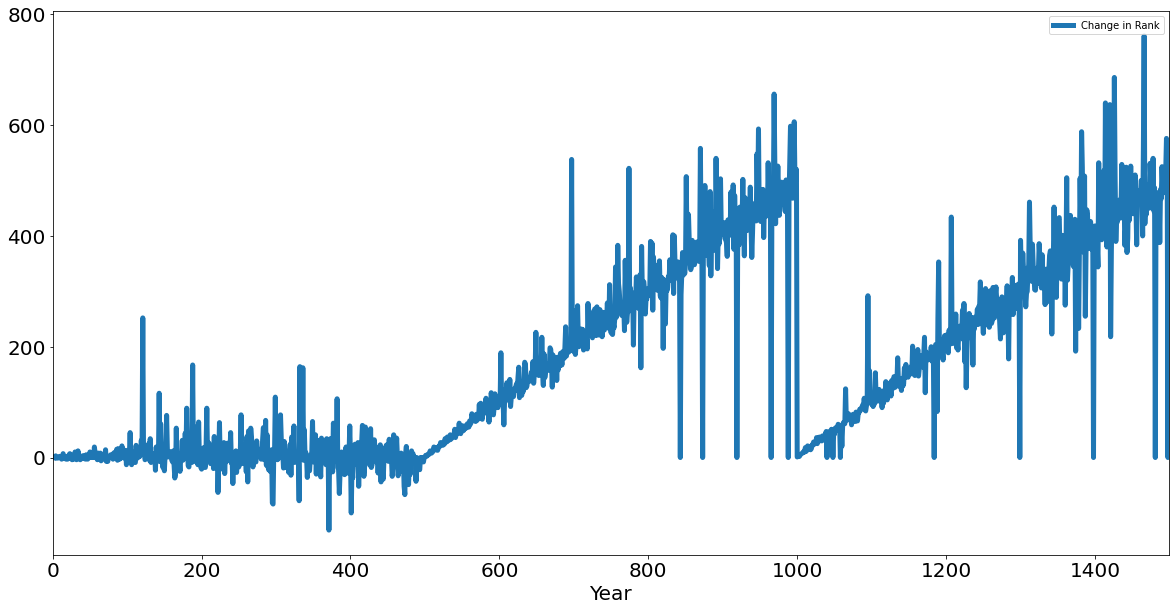

In [6]:
df[['Change in Rank']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
#Luis

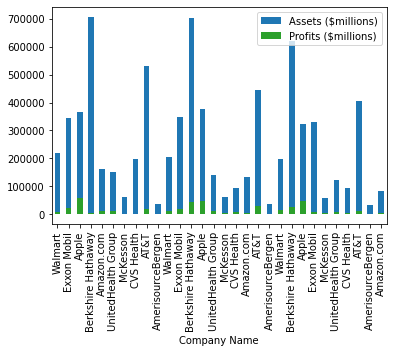

In [7]:
df1 = df[(df['Company Name'] == "Apple") | (df['Company Name'] == "Walmart") | (df['Company Name'] == "Exxon Mobil") | (df['Company Name'] == "Berkshire Hathaway") | (df['Company Name'] == "Amazon.com") | (df['Company Name'] == "UnitedHealth Group") | (df['Company Name'] == "McKesson") | (df['Company Name'] == "CVS Health") | (df['Company Name'] == "AT&T") | (df['Company Name'] == "AmerisourceBergen")]

ax = df1.plot(x="Company Name", y="Assets ($millions)", kind="bar")
df1.plot(x="Company Name", y="Profits ($millions)", kind="bar", ax=ax, color="C2")

#Usman

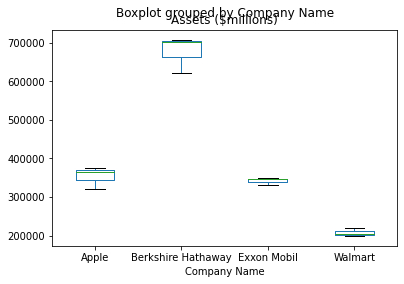

In [8]:
df1 = df[(df['Company Name'] == "Apple") | (df['Company Name'] == "Walmart") | (df['Company Name'] == "Exxon Mobil") | (df['Company Name'] == "Berkshire Hathaway")]
df1.boxplot(by ='Company Name', column =['Assets ($millions)'], grid = False) 
#Devang

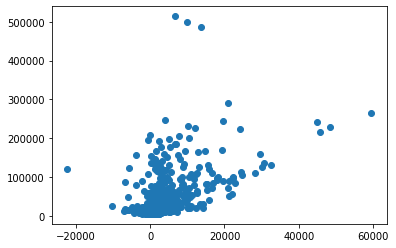

In [9]:
import matplotlib.pyplot as plt
import pandas
plt.scatter(x=df['Profits ($millions)'], y=df['Revenues ($millions)'])
plt.show()
#Devang

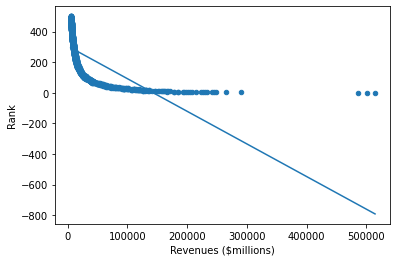

In [12]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
X_train = df[["Revenues ($millions)"]]
y_train = df["Rank"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)

model.predict(X=X_train)
y = model.coef_ * df["Revenues ($millions)"] + model.intercept_
df.plot.scatter(x="Revenues ($millions)", y="Rank")
plt.plot(df["Revenues ($millions)"], y)
#Devang

# Does Revenue have any effect on the company fortune 500 rank?

Yes, it does. As revenue increases, the company rank increases. It appears that the weight of revenue is quite heavy when it comes to Fortune 500 rankings.

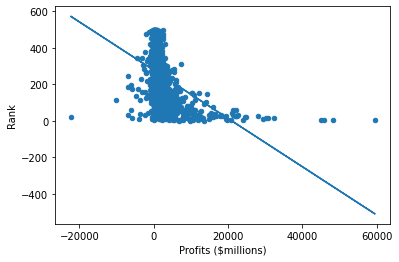

In [13]:
X_train = df[["Profits ($millions)"]]
y_train = df["Rank"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)

model.predict(X=X_train)
y = model.coef_ * df["Profits ($millions)"] + model.intercept_
df.plot.scatter(x="Profits ($millions)", y="Rank")
plt.plot(df["Profits ($millions)"], y)
#Devang

# Does Profit have any effect on the company fortune 500 rank?

No, not really. As profit increases, the company rank could increase or decrease. It appears that the weight of profit is not quite heavy when it comes to Fortune 500 rankings.

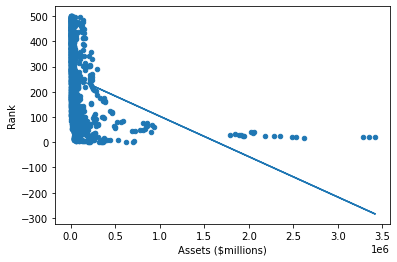

In [14]:
X_train = df[["Assets ($millions)"]]
y_train = df["Rank"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)

model.predict(X=X_train)
y = model.coef_ * df["Assets ($millions)"] + model.intercept_
df.plot.scatter(x="Assets ($millions)", y="Rank")
plt.plot(df["Assets ($millions)"], y)
#Devang

# Do Company Assets have any effect on the company fortune 500 rank?

No, not really. As assets increases, the company rank could increase or decrease. It appears that the weight of profit is not quite heavy when it comes to Fortune 500 rankings.

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X_train = df[["Revenues ($millions)","Profits ($millions)","Assets ($millions)"]]
y_train = df["Rank"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
X_test = pd.DataFrame({"Revenues ($millions)": 9455, "Profits($millions)": 1101, "Assets($millions)": 28173}, index = [0])
model.predict(X = X_test)
#Devang

array([285.82810888])

*We are predicting the rank number based off of revenue, profit and assests. We will be doing this for select set of companies. X_train will be training on the revenues(millions), assests(millions) and profits. Y_train will be what we are actually predidcting, which is going to be the rank. *

# Question: What will be the fortune 500 rank be of a company with certain stats on the following year of 2020?

ANSWER: The average rank of a company with stats of Revenues: 9,455,000,000, Profits: 1,101,000,000, Assets: 28,173,000,000 will be 285. This is a prediction for our model. 

In [16]:
ashen_model = LinearRegression()

X_train = df[["Revenue Change", "Profit Change", "Assets ($millions)"]]
y_train = df["Rank"]

ashen_model.fit(
    X=X_train,
    y=y_train
)

X_test = pd.DataFrame({"Revenue Change": 8, "Profit Change": 42, "Assets ($millions)": 83513.042}, index =[0])
ashen_model.predict(X = X_test)
#Usman

array([250.47570484])

Prediction the Median Fortune 500 Rank. If a company has less than: 8% positive revenue change, 42% positive profit change, and $83513.042 million in assets the company is gonna be in the bottom half of the fortune 500 company list while having values greater than the aforementioned values we can assume the company will be in the top 250 companies on the fortune 500 list.


In [17]:
ashen_model = LinearRegression()

X_train = df[["Number of Employees", "Profit Change", "Assets ($millions)"]]
y_train = df["Rank"]

ashen_model.fit(
    X=X_train,
    y=y_train
)

X_test = pd.DataFrame({"Number of Employees": 150000 , "Profit Change": 42, "Assets ($millions)": 83513.042}, index =[0])
ashen_model.predict(X = X_test)
#Luis

array([216.00412038])

In [18]:
ashen_model = LinearRegression()

X_train = df[["Number of Employees", "Market Value As of 3/29/19 ($m)", "Revenue Change"]]
y_train = df["Rank"]

ashen_model.fit(
    X=X_train,
    y=y_train
)

X_test = pd.DataFrame({"Number of Employees": 150000 , "Market Value As of 3/29/19 ($m)": 9455 , "Revenue Change": 10}, index =[0])
ashen_model.predict(X = X_test)
#Luis

array([244.51663257])

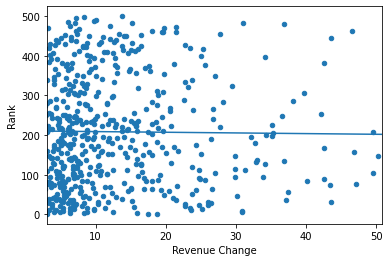

In [19]:
ashen_model1 = LinearRegression()


tips_train = df.loc[:750].copy()
tips_test = df.loc[751:].copy()

X_train1 = tips_train[["Revenue Change"]]
X_test1 = tips_test[["Revenue Change"]]
y_train1 = tips_train["Rank"]

ashen_model1.fit(X=X_train1, y=y_train1)
ashen_model1.predict(X=X_test1)

import numpy as np

X_new1 = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new1["Revenue Change"] = np.linspace(3.070000, 50.810000, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_1 = pd.Series(
    ashen_model1.predict(X_new1), # y values in Series.plot.line()
    index=X_new1["Revenue Change"]    # x values in Series.plot.line()
)

# plot the data, then the model
tips_train.plot.scatter(x="Revenue Change", y="Rank")
y_new_1.plot.line()
#Usman

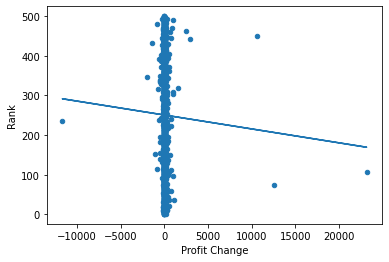

In [20]:
X_train = df[["Profit Change"]]
y_train = df["Rank"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)

model.predict(X=X_train)
y = model.coef_ * df["Profit Change"] + model.intercept_
df.plot.scatter(x="Profit Change", y="Rank")
plt.plot(df["Profit Change"], y)
#Usman